In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
def read_chat(file):
    global messages
#functon to read the exported chat
    open_chat = open(file, encoding = 'utf-8') #opens the file inputted
    read_chat = open_chat.read() #reads the file open
    messages = read_chat.split('\n') #splits the file into a list containing lines of strings

In [4]:
def cleaning_messages(messages): #cleaning the read txt file'
    global Date
    global Sender
    global Message
    global Time
    Date = []
    Sender = []
    Message= []
    Time = []
    for n in range(0, len(messages)-1):
        if str(messages[n].count(':')) == '2' and str(messages[n].count("/") < 4): #condition for message selection
            Date.append(messages[n][0:10].strip()) #appending date to appropriate column
            Time.append(messages[n][12:20].strip()) #appending time to appropriate column
            rest = messages[n][20:].strip() #putting the remaining strngs in a variable for more cleaning
            if(rest.find (':') != -1):
                Sender.append(rest[2: rest.index(':')]) #appending senders name to appropriate column
                Message.append(rest[rest.index(':')+1:]) #appending the chat to appropriate column
            else: # if condition is not met
                Sender.append('No sender')
                Message.append('No message')


In [5]:
def create_dataframe(Date, Sender,Message, Time): #this creates the pandas dataframe
    global df
    chat_dictionary = {'Date': Date, 'Time' : Time,'Sender': Sender, 'Message': Message} #dictionary to be used for df
    df = pd.DataFrame(chat_dictionary) # pandas dataframe
    return df.head(10) #first 10 values

In [10]:
a = 'WhatsApp Chat with DSC AI STACK(Amateur).txt'
read_chat(a)
cleaning_messages(messages)
create_dataframe(Date, Sender,Message, Time)

,Date,Time,Sender,Message
0,26/08/2020,8:52 pm,Engr Dee,Okay guys
1,26/08/2020,9:28 pm,Nifemi DSC,Ok
2,26/08/2020,9:30 pm,RehobothEEE,Yes sir
3,26/08/2020,11:37 pm,Mosope DSC,@mo_sopefoluwa
4,27/08/2020,12:46 am,+234 701 095 0358,"But please I need urgent help, while trying t..."
5,27/08/2020,12:46 am,+234 701 095 0358,Please I need help urgently 🙏...how do I go a...
6,27/08/2020,12:47 am,khok-maw'🚀,pip --upgrade pip or so
7,27/08/2020,12:48 am,khok-maw'🚀,pip install --upgrade pip
8,27/08/2020,12:50 am,+234 701 095 0358,"Yeahhhh...I tried it, it's saying upgrade pip..."
9,27/08/2020,12:51 am,+234 701 095 0358,That my pip is already in 20.2.2


In [11]:
pd.value_counts(df['Sender'])

Success DSC             1588
khok-maw'🚀              1005
Ire                      753
RehobothEEE              358
‎Reserve DSC             351
Lateef DSC               344
+234 905 635 7349        215
+234 701 095 0358        198
+234 902 590 5787        141
Avogrado                 136
Sir Fuad                 131
+234 903 836 8530         65
Mosope DSC                58
Nifemi DSC                50
+234 706 749 2346         39
Triumph DSC               36
Engr Dee                  27
No sender                  3
+234 906 639 9274          1
 -1                        1
this article ( https       1
Name: Sender, dtype: int64

In [12]:
df['Sender'].value_counts()[0:1] #highest number of messages

Success DSC    1588
Name: Sender, dtype: int64

C:\Users\owner\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\owner\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 56960 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\owner\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\owner\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 56960 missing from current font.
  font.set_text(s, 0, flags=flags)


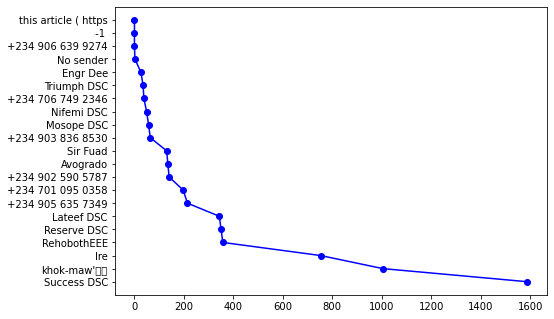

In [13]:
a = list(df['Sender'].value_counts())
b = df['Sender'].value_counts().keys()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(a,b,'bo-')

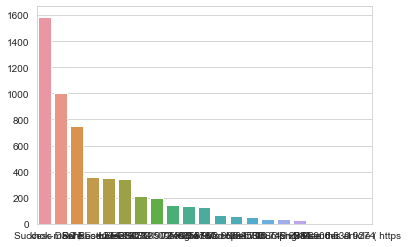

In [14]:
sns.set_style('whitegrid')

a = list(df['Sender'].value_counts())
b = df['Sender'].value_counts().keys()
sns.barplot(x=b,y=a,data = df)

In [21]:
df['Sender'].iloc[:561].value_counts() #number of messages in august

Ire                  109
+234 701 095 0358    102
Success DSC           77
Lateef DSC            62
+234 903 836 8530     43
khok-maw'🚀            39
Avogrado              25
+234 902 590 5787     22
RehobothEEE           18
Nifemi DSC            16
Triumph DSC           15
‎Reserve DSC           9
+234 905 635 7349      9
Engr Dee               5
+234 706 749 2346      4
No sender              3
Sir Fuad               2
Mosope DSC             1
Name: Sender, dtype: int64

In [22]:
df['Sender'].iloc[561:].value_counts()#number of messages in september

Success DSC             1511
khok-maw'🚀               966
Ire                      644
‎Reserve DSC             342
RehobothEEE              340
Lateef DSC               282
+234 905 635 7349        206
Sir Fuad                 129
+234 902 590 5787        119
Avogrado                 111
+234 701 095 0358         96
Mosope DSC                57
+234 706 749 2346         35
Nifemi DSC                34
+234 903 836 8530         22
Engr Dee                  22
Triumph DSC               21
+234 906 639 9274          1
 -1                        1
this article ( https       1
Name: Sender, dtype: int64